In [1]:
import pandas as pd
import numpy as np


In [2]:
unitech_df = pd.read_csv("UNITECH.csv")
beml_df = pd.read_csv("BEML.csv")
infy_df = pd.read_csv("INFY.csv")
glaxo_df = pd.read_csv("GLAXO.csv")

In [3]:
unitech_df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,82.9,83.80,82.45,82.80,82.80,19904383.0,16526.18
1,2010-01-05,83.5,84.90,83.40,84.00,84.10,34197626.0,28820.01
2,2010-01-06,84.5,85.45,83.20,84.70,84.85,34704003.0,29360.29
3,2010-01-07,85.2,85.70,83.85,84.15,84.15,28855332.0,24461.35
4,2010-01-08,84.0,87.50,84.00,86.60,86.60,49805151.0,43006.54


In [4]:
beml_df["gain"] = beml_df.apply( lambda rec: round( ( rec.Close - rec.Open ) / rec.Open, 2 ), axis = 1 )
infy_df["gain"] = infy_df.apply( lambda rec: round( ( rec.Close - rec.Open ) / rec.Open, 2 ), axis = 1 )
glaxo_df["gain"] = glaxo_df.apply( lambda rec: round( ( rec.Close - rec.Open ) / rec.Open, 2 ), axis = 1 )
unitech_df["gain"] = unitech_df.apply(lambda rec: round((rec.Close - rec.Open)/rec.Open, 2), axis = 1 )
unitech_df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
0,2010-01-04,82.9,83.80,82.45,82.80,82.80,19904383.0,16526.18,-0.00
1,2010-01-05,83.5,84.90,83.40,84.00,84.10,34197626.0,28820.01,0.01
2,2010-01-06,84.5,85.45,83.20,84.70,84.85,34704003.0,29360.29,0.00
3,2010-01-07,85.2,85.70,83.85,84.15,84.15,28855332.0,24461.35,-0.01
4,2010-01-08,84.0,87.50,84.00,86.60,86.60,49805151.0,43006.54,0.03


In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

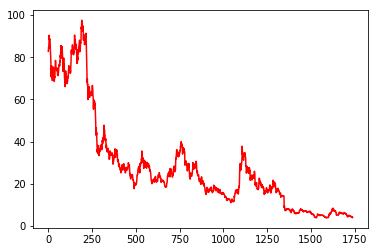

In [6]:
plt.plot(unitech_df.Close, 'r')

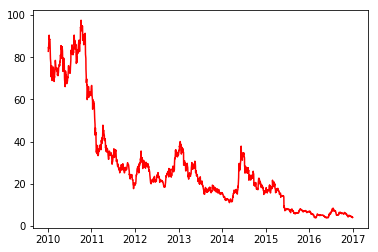

In [7]:
unitech_df = unitech_df.set_index(pd.DatetimeIndex(unitech_df['Date']) )

plt.plot(unitech_df.Close, 'r')


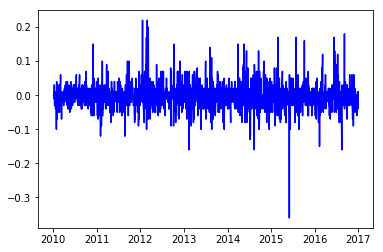

In [8]:
plt.plot(unitech_df.gain, 'b')


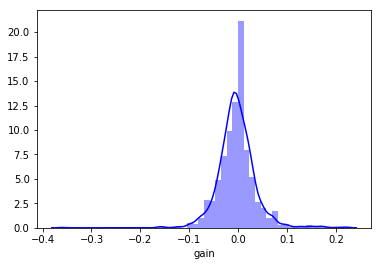

In [9]:
sn.distplot(unitech_df.gain, color = 'b')

In [10]:
unitech_df.gain.describe()

count    1739.000000
mean       -0.003191
std         0.038511
min        -0.360000
25%        -0.020000
50%         0.000000
75%         0.020000
max         0.220000
Name: gain, dtype: float64

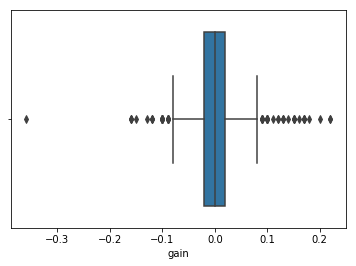

In [11]:
sn.boxplot(unitech_df.gain)

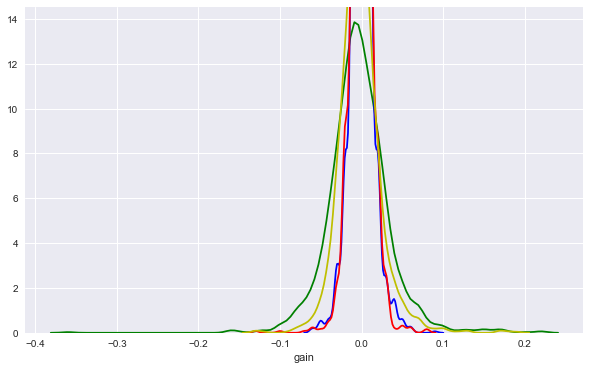

In [12]:
sn.set(rc={"figure.figsize": (10, 6)});
sn.distplot( unitech_df.gain, hist = False, color = 'g' )
sn.distplot( glaxo_df.gain, hist = False, color = 'b' )
sn.distplot( infy_df.gain, hist = False, color = 'r' )
sn.distplot( beml_df.gain, hist = False, color = 'y' )

In [13]:


from scipy import stats


In [14]:
unitech_95_ci = stats.norm.interval(0.95, loc = unitech_df.gain.mean(), scale=unitech_df.gain.std())

In [15]:
unitech_95_ci

(-0.078671141686216306, 0.072288162962812069)

In [16]:
stats.norm.cdf(-0.02, loc = unitech_df.gain.mean(), scale=unitech_df.gain.std())

0.33125041931711174